In [26]:
import pickle
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from scipy.spatial import Voronoi, voronoi_plot_2d
import matplotlib.patches as patches
from matplotlib.patches import Arc, RegularPolygon
from numpy import radians as rad
from IPython.display import display, clear_output
from ipywidgets import IntSlider, Output

Plots to visualize clusters and clustering space of different RNNs. Some of the data is missing in such case for a selected
setting, in such case no plot is displayed.

In [27]:
def load_pickle(file_name):
    infile = open(file_name,'rb')
    pickle_file = pickle.load(infile)
    infile.close()
    return pickle_file

def drawCirc(ax, radius, centX, centY, angle_, theta2_, color_='black'):
    # ========Line
    arc = Arc([centX, centY], radius, radius, angle=angle_,
              theta1=0, theta2=theta2_, capstyle='round', linestyle='-', lw=4, color=color_)
    ax.add_patch(arc)

    # ========Create the arrow head
    endX = centX + (radius / 2) * np.cos(rad(theta2_ + angle_))  # Do trig to determine end position
    endY = centY + (radius / 2) * np.sin(rad(theta2_ + angle_))

    ax.add_patch(  # Create triangle as arrow head
        RegularPolygon(
            (endX, endY),  # (x,y)
            3,  # number of vertices
            radius / 9,  # radius
            rad(angle_ + theta2_),  # orientation
            color=color_
        )
    )
    #ax.set_xlim([centX - radius, centY + radius]) and ax.set_ylim([centY - radius, centY + radius])


In [28]:
spices = load_pickle("RNN2PFA-Plotpickles/spices.pkl")
experiment_configuration = load_pickle("RNN2PFA-Plotpickles/experiment_configuration.pkl")


This is a scatter plot of 50000 latent spaces sampled from every Spice RNN, use the slider to select the
spice to visualise.

In [32]:
%matplotlib inline
spice=widgets.widgets.SelectionSlider(
    options=spices,
    value='Spice10',
    description='Spice:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
)

def plotscatter(spice=spice):
    file_name = "RNN2PFA-Plotpickles/pca_data/"+spice+"/pca_data.pkl"
    #file_name = "RNN2PFA_plotting_pickles/"+spice+"-40-1/pca_data.pkl"
    infile = open(file_name,'rb')
    pca_data = pickle.load(infile)
    infile.close()
    plt.figure(1)
    plt.figure(figsize=(10, 10))
    plt.scatter(pca_data[:,0], pca_data[:,1], s=.005, c='g')
    plt.show()
interact(plotscatter)

interactive(children=(SelectionSlider(continuous_update=False, description='Spice:', index=9, options=('Spice1…

<function __main__.plotscatter(spice=SelectionSlider(continuous_update=False, description='Spice:', index=9, options=('Spice1', 'Spice2', 'Spice3', 'Spice4', 'Spice5', 'Spice6', 'Spice7', 'Spice8', 'Spice9', 'Spice10', 'Spice12', 'Spice14'), value='Spice10'))>

This plot shows the clustering boundaries(voronoi) of the Kmeans for every spice, Use spice slider to select
spice RNN and clusters slider to select number of clusters.


In [33]:
spice=widgets.widgets.SelectionSlider(
    options=spices,
    value='Spice1',
    description='Spice:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
)

clusters = widgets.SelectionSlider(
    #options=['40', '100', '400', '600', '1000'],
    options=[40, 100, 400, 600, 1000],
    value=40,
    description='Clusters: ',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
)
def plotclusters(spice=spice, cluster = clusters):
    file_name = "RNN2PFA-Plotpickles/transition_data/"+spice+"-"+str(cluster)+"-1/transformed_centers.pkl"
    #file_name = "RNN2PFA_plotting_pickles/"+spice+"-"+str(cluster)+"-1/transformed_centers.pkl"
    #infile = open("RNN2PFA_plotting_pickles/Spice1-1000-1/transformed_centers.pkl",'rb')
    infile = open(file_name,'rb')
    transformed_centers = pickle.load(infile)
    infile.close()
    vor=Voronoi(transformed_centers)
    plt.rcParams["figure.figsize"] = (10, 10)
    fig = voronoi_plot_2d(vor, show_vertices=False, show_points=True, line_colors='orange',
                    line_width=1, line_alpha=0.6, point_size=2)
    fig.suptitle(spice)
interact(plotclusters)


interactive(children=(SelectionSlider(continuous_update=False, description='Spice:', options=('Spice1', 'Spice…

<function __main__.plotclusters(spice=SelectionSlider(continuous_update=False, description='Spice:', options=('Spice1', 'Spice2', 'Spice3', 'Spice4', 'Spice5', 'Spice6', 'Spice7', 'Spice8', 'Spice9', 'Spice10', 'Spice12', 'Spice14'), value='Spice1'), cluster=SelectionSlider(continuous_update=False, description='Clusters: ', options=(40, 100, 400, 600, 1000), value=40))>

This interactive module shows the transitions in the cluster space. Use spice slider for selecting RNN, clusters slider for number of clusters, sample slider to select one of the 4 test samples and finally transitions slider to
slide through the transitions.<br><br>

The text on the image shows the test string, and a bold arrow marks represent the current transition.
as shown below.

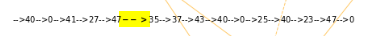

In [37]:
from IPython import display
display.Image("RNN2PFA-Plotpickles/transition.PNG")

In [38]:
out = Output()
%matplotlib inline
spice=widgets.widgets.SelectionSlider(
    options=spices,
    value='Spice10',
    description='Spice:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
)
clusters = widgets.SelectionSlider(
    options=[40, 100, 400, 600, 1000],
    value=40,
    description='Clusters: ',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
)
sample = widgets.SelectionSlider(
    options=[1,2,3,4],
    value=1,
    description='Sample: ',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
)
transition = widgets.SelectionSlider(
    options=np.arange(0, 45).tolist(),
    value=0,
    description='Transition: ',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
)

def update_plot(spice, clusters, sample, transition):
    fig = plt.figure(figsize=(15, 15))
    ax = fig.add_subplot(1,1,1)
    next_clusters_centers_file = "RNN2PFA_plotting_pickles/"+spice+"-"+str(clusters)+"-"+str(sample)+"/next_clusters_centers.pkl"
    next_cluster_centers=load_pickle(next_clusters_centers_file)
    next_cluster_centers.insert(0, [0, 0])
    transformed_centers_file = "RNN2PFA-Plotpickles/transition_data/"+spice+"-"+str(clusters)+"-"+str(sample)+"/transformed_centers.pkl"
    transformed_centers=load_pickle(transformed_centers_file)
    vor=Voronoi(transformed_centers)
    plt.rcParams["figure.figsize"] = (10, 10)
    style = "Simple, tail_width=0.5, head_width=8, head_length=30"
    kw = dict(arrowstyle=style, color="k", linewidth=4)
    fig = voronoi_plot_2d(vor, show_vertices=False, show_points=True, line_colors='orange',
                    line_width=1, line_alpha=0.6, point_size=2, ax=ax)
    if transition < len(next_cluster_centers):
        if next_cluster_centers[transition][0] != next_cluster_centers[transition+1][0] and next_cluster_centers[transition][1] != next_cluster_centers[transition+1][1]:
            a1 = patches.FancyArrowPatch((next_cluster_centers[transition][0], next_cluster_centers[transition][1]),
                                                     (next_cluster_centers[transition + 1][0], next_cluster_centers[transition + 1][1]), **kw)
            plt.gca().add_patch(a1)
        else:
            drawCirc(plt.gca(), 1, next_cluster_centers[transition][0], next_cluster_centers[transition][1], 0, 1000)
    plot_test_string=""
    test_list = [i for i in experiment_configuration[spice]['test_strings'][sample-1].split()]
    for j, i in enumerate(test_list):
        if j==transition:
            plot_test_string = plot_test_string + r"$\bf{-->}$" + i
        else:
            plot_test_string = plot_test_string + "-->" + i
    plt.text(ax.get_xlim()[0]+0.5, ax.get_ylim()[1]-0.5, plot_test_string)
    fig.show()

interactive(update_plot, spice=spice, clusters=clusters, sample=sample, transition=transition)
#widgets.HBox([transition, slider])

interactive(children=(SelectionSlider(continuous_update=False, description='Spice:', index=9, options=('Spice1…